# Data Visualization

As a disclaimer, this assignment is optional review, since data visualization is a topic that should have been covered by other projects. However, we have decided to include this assignment for your reference anyways, and you may choose to complete it to refresh your memory. 

This assignment walks through the conceptual ideas behind data visualizations, as well as how to create them with Matplotlib and Seaborn.

First, we import some libraries and load some datasets.  

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
car_crashes = sns.load_dataset("car_crashes")
titanic = sns.load_dataset("titanic")
diamonds = sns.load_dataset("diamonds")
iris = sns.load_dataset("iris")
fmri = sns.load_dataset("fmri")

### Using the Appropriate Visualization

This assignment will cover these five basic visualizations: 
1. Bar Charts
2. Multi-level Bar Charts
3. Histograms
4. Scatter Plots
5. Line Charts

If you need a refresher on these visualizations, be sure to refer to the slides or the notes. 

Of the five visualizations presented, which ones are appropriate for categorical variables? How many categorical variables does each visualization allow for? Justify why each visualization is appropriate. 

**SOLUTION**

<span style="color: blue;">
    <li>Bar charts can plot the distribution of a single categorical variable. This visualization is appropriate, since each bar in the bar chart plots the percentage or counts of one unique label in the categorical variable. This means that the bar chart concisely describes how often each label appears in the variable.</li>
    <li>Multi-level bar charts can plot the distribution of two or more categorical variables. However, more than two variables are rarely plotted, since that can clutter the visualization and hinder the effectiveness of the plot. This visualization is appropriate because each bar in the chart still plots a percentage or count, except now for each unique value for each variable. The number of bars in a multi-level bar chart is the product of the number of unique values for each variable plotted.</li>
</span>

Of the five visualizations presented, which ones are appropriate for quantitative variables? How many quantitative variables does each visualization allow for? Justify why each visualization is appropriate. 

**SOLUTION**

<span style="color: blue;">
<li>Histograms can plot the distribution of a single quantitative variable. This visualization is appropriate, since the histogram plots the variable's range of values on a count or density scale. This allows humans to quickly judge what a variable's distribution looks like (eg. bimodal, skewed, roughly normal, etc.) with just a cursory glance at the plot.</li>
<li>Scatter plots can plot the distribution of two or three quantitative variables. However, a 3D scatter plot that plots three variables is only situationally useful, as it requires a computer to view and is more difficult to immediately gather information from when compared with a 2D scatter plot. This visualization is appropriate because each point plotted on scatter plot encodes information about both variables at the same time. Each axis of the plot represents on of the variables.</li>
<li>Line plots are very similar to scatter plots in terms of functionality, and can help visualize two quantitative variables. Having a 3D line plot is possible, but they can be difficult to read. They serve a niche role of being more effective visualizations than scatter plots when you want to interpolate the points to form a clearer pattern, which may be the case if one of the variables has non-repeating (eg. time series data). They are appropriate visualizations for the same reason scatter plots are.</li>
</span>

### Good Visualization Practices

What makes a good visualization? The intuitive answer is that they are easy to read and can quickly offer clear and accurate information. Each of the following visualizations below is problematic; find what the issue is and explain how to fix it. 

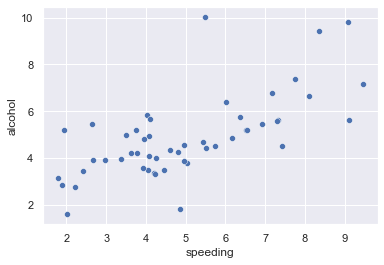

In [3]:
sns.scatterplot(
    data = car_crashes,
    x = "speeding",
    y = "alcohol"
)
plt.show()

What's wrong with the above visualization? 

**SOLUTION**

<span style="color: blue;">
There's two problems with the above visualization: first, the visualization is missing a title, despite having the axis labels. While the title is less important than the axis labels, it is still bad practice to leave it out. The more significant problem with the visualization is that it doesn't have units on the axis. It's not immediately clear what "speeding" or "alcohol" mean on scales from 0-10. To fix this, the graph should have either added units or provided an explanation on what the variables represent.
</span>


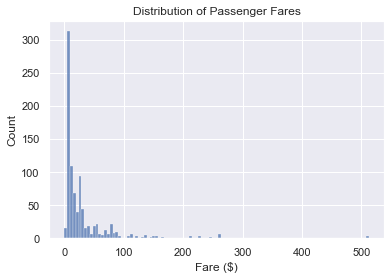

In [4]:
sns.histplot(
    data = titanic, 
    x = "fare"
)
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare ($)")
plt.show()

What's wrong with the above visualization? 

**SOLUTION**

<span style="color: blue;">
The main problem with this visualization is the scale of the x axis. Although there exist data points where the fare is more than $500, zooming so far out on the axis makes it more difficult for us to look at the majority of the data. By including these in the visualization, the visualization sacrifices the readability for the rest of the data. Setting a more appropriate x axis such as from 0 to 200 would solve this issue. 
</span>


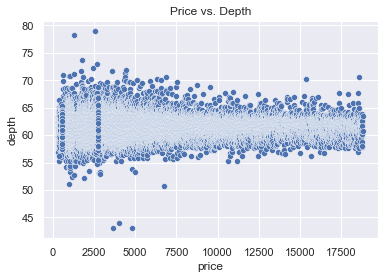

In [5]:
sns.scatterplot(
    data = diamonds, 
    x = "price",
    y = "depth"
)
plt.title("Price vs. Depth")
plt.show()

What's wrong with the above visualization? 

**SOLUTION**

<span style="color: blue;">
The main problem with this plot should be immediately apparent; there is a severe case of overplotting, and it is difficult to tell what's even going on due to the excessive amount of points. There are several fixes for overplotting; here are two of them: first, a subset of all the points can be sampled and plotted, so that there's fewer points on the graph. Using a smoothing plot like a hex plot would also be appropriate to show the general shape of the distribution. 
</span>


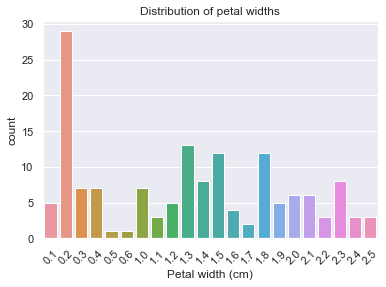

In [6]:
plot = sns.countplot(
    data = iris, 
    x = "petal_width"
)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plt.xlabel("Petal width (cm)")
plt.title("Distribution of petal widths")
plt.show()

What's wrong with the above visualization? 

**SOLUTION**

<span style="color: blue;">
In the above graph, we've used a bar chart when we should have used a histogram, since bar charts are for categorical variables. Although this roughly resembles a histogram, the problem with this chart is that the x axis is very misleading. For example, we have steady intervals of a 0.1 increase from 0.1 to 0.6, and then width suddenly jumps to 1.0. However, these bars are still next to each other with no change in width, so that jump in width could easily be missed. Additionally, the iris dataset is very small and contains a limited selection of unique values. However, if there were many unique values, which is definitely possible since petal width is a quantitative variable, the bar chart would be very wide as well. 
</span>


### Creating Visualizations with Seaborn

Now that you know when to use what kind of visualization, as well as common pitfalls to avoid, you can now create your own visualizations! Use Seaborn and Matplotlib to generate the graphs described by the prompts. Make sure to include the appropriate axis labels and chart titles as well. 

Create a multi-level bar chart of counts `titanic` dataset, where the first level is the passenger's class and the second level (specified by color) is the town the passenger embarked from. 

*Hint: You may find the "hue" argument useful in seaborn functions.*

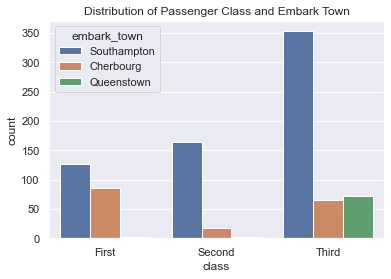

In [7]:
# BEGIN SOLUTION
sns.countplot(
    data = titanic,
    x = "class", 
    hue = "embark_town"
)
plt.title("Distribution of Passenger Class and Embark Town")
# END SOLUTION 

plt.show()

Create a line plot for the `fmri` dataset, where signal is plotted against the timepoints. Create one line for each distinct region. The unit for timepoint is in seconds, and it's fine to exclude the units for signal (the signal has a complicated interpretation that requires reading a comprehensive paper to understand). 

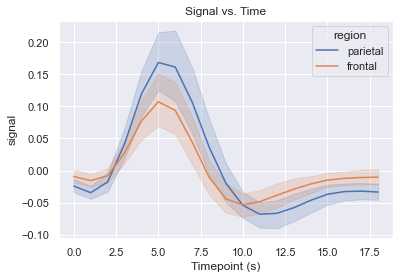

In [8]:
# BEGIN SOLUTION
sns.lineplot(
    data = fmri, 
    x = "timepoint", 
    y = "signal", 
    hue = "region"
)
plt.xlabel("Timepoint (s)")
plt.title("Signal vs. Time")
# END SOLUTION 

plt.show()

Fix the histogram of the `titanic` passenger fares shown in the previous section. Set the range of the x axis for the fares to be from 0 to 150. 

*Hint: You can specify bins in the Seaborn function, or manually change the x axis using Matplotlib.*

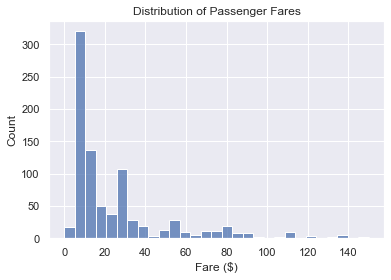

In [9]:
# BEGIN SOLUTION
sns.histplot(
    data = titanic, 
    x = "fare", 
    bins = np.linspace(0, 150, 30)
)
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare ($)")
# END SOLUTION 

plt.show()

Fix the scatter plot of the `diamonds` dataset shown in the previous section. Use a hex plot of the data instead of a scatter plot.

*Hint: You may find `sns.jointplot` useful.*

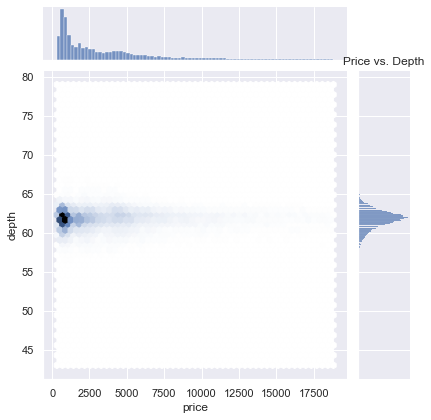

In [10]:
# BEGIN SOLUTION
sns.jointplot(
    data = diamonds, 
    x = "price",
    y = "depth",
    kind = "hex"
)
plt.title("Price vs. Depth")
# END SOLUTION 

plt.show()